<h1 align="center">SimpleITK Spatial Transformations</h1>


**Summary:**

1. Points are represented by vector-like data types: Tuple, Numpy array, List.
2. Matrices are represented by vector-like data types in row major order.
3. Default transformation initialization as the identity transform.
4. Angles specified in radians, distances specified in unknown but consistent units (nm,mm,m,km...).
5. All global transformations **except translation** are of the form:
$$T(\mathbf{x}) = A(\mathbf{x}-\mathbf{c}) + \mathbf{t} + \mathbf{c}$$

   Nomenclature (when printing your transformation):

   * Matrix: the matrix $A$
   * Center: the point $\mathbf{c}$
   * Translation: the vector $\mathbf{t}$
   * Offset: $\mathbf{t} + \mathbf{c} - A\mathbf{c}$
6. Bounded transformations, BSplineTransform and DisplacementFieldTransform, behave as the identity transform outside the defined bounds.
7. DisplacementFieldTransform:
   * Initializing the DisplacementFieldTransform using an image requires that the image's pixel type be sitk.sitkVectorFloat64.
   * Initializing the DisplacementFieldTransform using an image will "clear out" your image (your alias to the image will point to an empty, zero sized, image).
8. Composite transformations are applied in stack order (first added, last applied).

## Transformation Types

SimpleITK supports the following transformation types.

| Class Name | Details|
|:-------------|:---------|
|[TranslationTransform](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1TranslationTransform.html) | 2D or 3D, translation|
|[VersorTransform](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1VersorTransform.html)| 3D, rotation represented by a versor|
|[VersorRigid3DTransform](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1VersorRigid3DTransform.html)|3D, rigid transformation with rotation represented by a versor|
|[Euler2DTransform](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1Euler2DTransform.html)| 2D, rigid transformation with rotation represented by a Euler angle|
|[Euler3DTransform](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1Euler3DTransform.html)| 3D, rigid transformation with rotation represented by Euler angles|
|[Similarity2DTransform](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1Similarity2DTransform.html)| 2D, composition of isotropic scaling and rigid transformation with rotation represented by a Euler angle|
|[Similarity3DTransform](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1Similarity3DTransform.html) | 3D, composition of isotropic scaling and rigid transformation with rotation represented by a versor|
|[ScaleTransform](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1ScaleTransform.html)|2D or 3D, anisotropic scaling|
|[ScaleVersor3DTransform](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1ScaleVersor3DTransform.html)| 3D, rigid transformation and anisotropic scale is **added** to the rotation matrix part (not composed as one would expect)|
|[ScaleSkewVersor3DTransform](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1ScaleSkewVersor3DTransform.html#details)|3D, rigid transformation with anisotropic scale and skew matrices **added** to the rotation matrix part (not composed as one would expect) |
|[ComposeScaleSkewVersor3DTransform](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1ComposeScaleSkewVersor3DTransform.html)| 3D, a composition of rotation $R$, scaling $S$, and shearing $K$, $A=RSK$ in addition to translation. |
|[AffineTransform](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1AffineTransform.html)| 2D or 3D, affine transformation|
|[BSplineTransform](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1BSplineTransform.html)|2D or 3D, deformable transformation represented by a sparse regular grid of control points |
|[DisplacementFieldTransform](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1DisplacementFieldTransform.html)| 2D or 3D, deformable transformation represented as a dense regular grid of vectors|
|[CompositeTransform](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1CompositeTransform.html)| 2D or 3D, stack of transformations concatenated via composition, last added, first applied|
|[Transform](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1Transform.html#details) | 2D or 3D, parent/super-class for all transforms

In [4]:
import SimpleITK as sitk
import utilities as util

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

OUTPUT_DIR = "output"

We will introduce the transformation types, starting with translation and illustrating how to move from a lower to higher parameter space (e.g. translation to rigid).  

We start with the global transformations. All of them <b>except translation</b> are of the form:
$$T(\mathbf{x}) = A(\mathbf{x}-\mathbf{c}) + \mathbf{t} + \mathbf{c}$$

In ITK speak (when printing your transformation):
<ul>
<li>Matrix: the matrix $A$</li>
<li>Center: the point $\mathbf{c}$</li>
<li>Translation: the vector $\mathbf{t}$</li>
<li>Offset: $\mathbf{t} + \mathbf{c} - A\mathbf{c}$</li>
</ul>

## TranslationTransform

Create a translation and then transform a point and use the inverse transformation to get the original back.

In [5]:
dimension = 2
offset = [2] * dimension  # use a Python trick to create the offset list based on the dimension
translation = sitk.TranslationTransform(dimension, offset)
print(translation)

itk::simple::TranslationTransform
 TranslationTransform (00000210BF5B3020)
   RTTI typeinfo:   class itk::TranslationTransform<double,2>
   Reference Count: 1
   Modified Time: 1666
   Debug: Off
   Object Name: 
   Observers: 
     none
   Offset: [2, 2]



In [7]:
point = [10, 11] if dimension == 2 else [10, 11, 12]  # set point to match dimension
transformed_point = translation.TransformPoint(point)
translation_inverse = translation.GetInverse()
print(
    "original point: " + util.point2str(point) + "\n"
    "transformed point: " + util.point2str(transformed_point) + "\n"
    "back to original: "
    + util.point2str(translation_inverse.TransformPoint(transformed_point))
)

original point: 10.0 11.0
transformed point: 12.0 13.0
back to original: 10.0 11.0


## Euler2DTransform

Rigidly transform a 2D point using a Euler angle parameter specification.

Notice that the dimensionality of the Euler angle based rigid transformation is associated with the class, unlike the translation which is set at construction.


In [9]:
point = [10, 11]
rotation2D = sitk.Euler2DTransform()
rotation2D.SetTranslation((7.2, 8.4))
rotation2D.SetAngle(np.pi / 2)
print(
    "original point: " + util.point2str(point) + "\n"
    "transformed point: " + util.point2str(rotation2D.TransformPoint(point))
)

original point: 10.0 11.0
transformed point: -3.8 18.4


## VersorTransform (rotation in 3D)

Rotation using a versor, vector part of unit quaternion, parametrization. Quaternion defined by rotation of $\theta$ radians around axis $n$, is $q = [n*\sin(\frac{\theta}{2}), \cos(\frac{\theta}{2})]$.

In [10]:
# Use a versor:
rotation1 = sitk.VersorTransform([0, 0, 1, 0])

# Use axis-angle:
rotation2 = sitk.VersorTransform((0, 0, 1), np.pi)

# Use a matrix:
rotation3 = sitk.VersorTransform()
rotation3.SetMatrix([-1, 0, 0, 0, -1, 0, 0, 0, 1])

point = (10, 100, 1000)

p1 = rotation1.TransformPoint(point)
p2 = rotation2.TransformPoint(point)
p3 = rotation3.TransformPoint(point)

print(
    "Points after transformation:\np1="
    + str(p1)
    + "\np2="
    + str(p2)
    + "\np3="
    + str(p3)
)

Points after transformation:
p1=(-10.0, -100.0, 1000.0)
p2=(-10.000000000000012, -100.0, 1000.0)
p3=(-10.0, -100.0, 1000.0)


## Translation to Rigid [3D]

We only need to copy the translational component.

In [12]:
dimension = 3
t = (1, 2, 3)
translation = sitk.TranslationTransform(dimension, t)

# Copy the translational component.
rigid_euler = sitk.Euler3DTransform()
rigid_euler.SetTranslation(translation.GetOffset())

# Apply the transformations to the same set of random points and compare the results.
util.print_transformation_differences(translation, rigid_euler)

Differences - min: 0.00, max: 0.00, mean: 0.00, std: 0.00


## Rotation to Rigid [3D]
Copy the matrix or versor and <b>center of rotation</b>.

In [20]:
rotation_center = (10, 10, 10)
rotation = sitk.VersorTransform([0, 0, 1, 0], rotation_center)

rigid_versor = sitk.VersorRigid3DTransform()
rigid_versor.SetRotation(rotation.GetVersor())
# rigid_versor.SetCenter(rotation.GetCenter()) #intentional error, not copying center of rotation

# Apply the transformations to the same set of random points and compare the results.
util.print_transformation_differences(rotation, rigid_versor)

Differences - min: 28.28, max: 28.28, mean: 28.28, std: 0.00


In the cell above, when we don't copy the center of rotation we have a constant error vector, $\mathbf{c}$ - A $\mathbf{c}$.

## Similarity [2D]

When the center of the similarity transformation is not at the origin the effect of the transformation is not what most of us expect. This is readily visible if we limit the transformation to scaling: $T(\mathbf{x}) = s\mathbf{x}-s\mathbf{c} + \mathbf{c}$. Changing the transformation's center results in scale + translation.

In [15]:
def display_center_effect(x, y, tx, point_list, xlim, ylim):
    tx.SetCenter((x, y))
    transformed_point_list = [tx.TransformPoint(p) for p in point_list]

    plt.scatter(
        list(np.array(transformed_point_list).T)[0],
        list(np.array(transformed_point_list).T)[1],
        marker="^",
        color="red",
        label="transformed points",
    )
    plt.scatter(
        list(np.array(point_list).T)[0],
        list(np.array(point_list).T)[1],
        marker="o",
        color="blue",
        label="original points",
    )
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend(loc=(0.25, 1.01))


# 2D square centered on (0,0)
points = [
    np.array((-1.0, -1.0)),
    np.array((-1.0, 1.0)),
    np.array((1.0, 1.0)),
    np.array((1.0, -1.0)),
]

# Scale by 2
similarity = sitk.Similarity2DTransform()
similarity.SetScale(2)

interact(
    display_center_effect,
    x=(-10, 10),
    y=(-10, 10),
    tx=fixed(similarity),
    point_list=fixed(points),
    xlim=fixed((-10, 10)),
    ylim=fixed((-10, 10)),
);

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='y'…

## Rigid to Similarity [3D]
Copy the translation, center, and matrix or versor.

In [16]:
rotation_center = (100, 100, 100)
theta_x = 0.0
theta_y = 0.0
theta_z = np.pi / 2.0
translation = (1, 2, 3)

rigid_euler = sitk.Euler3DTransform(
    rotation_center, theta_x, theta_y, theta_z, translation
)

similarity = sitk.Similarity3DTransform()
similarity.SetMatrix(rigid_euler.GetMatrix())
similarity.SetTranslation(rigid_euler.GetTranslation())
similarity.SetCenter(rigid_euler.GetCenter())

# Apply the transformations to the same set of random points and compare the results.
util.print_transformation_differences(rigid_euler, similarity)

Differences - min: 0.00, max: 0.00, mean: 0.00, std: 0.00


## Similarity to Affine [3D]
Copy the translation, center and matrix.

In [21]:
rotation_center = (100, 100, 100)
axis = (0, 0, 1)
angle = np.pi / 2.0
translation = (1, 2, 3)
scale_factor = 2.0
similarity = sitk.Similarity3DTransform(
    scale_factor, axis, angle, translation, rotation_center
)

affine = sitk.AffineTransform(3)
affine.SetMatrix(similarity.GetMatrix())
affine.SetTranslation(similarity.GetTranslation())
affine.SetCenter(similarity.GetCenter())

# Apply the transformations to the same set of random points and compare the results.
util.print_transformation_differences(similarity, affine)

Differences - min: 0.00, max: 0.00, mean: 0.00, std: 0.00


## Scale Transform

Just as the case was for the similarity transformation above, when the transformations center is not at the origin, instead of a pure anisotropic scaling we also have translation ($T(\mathbf{x}) = \mathbf{s}^T\mathbf{x}-\mathbf{s}^T\mathbf{c} + \mathbf{c}$).

In [22]:
# 2D square centered on (0,0).
points = [
    np.array((-1.0, -1.0)),
    np.array((-1.0, 1.0)),
    np.array((1.0, 1.0)),
    np.array((1.0, -1.0)),
]

# Scale by half in x and 2 in y.
scale = sitk.ScaleTransform(2, (0.5, 2))

# Interactively change the location of the center.
interact(
    display_center_effect,
    x=(-10, 10),
    y=(-10, 10),
    tx=fixed(scale),
    point_list=fixed(points),
    xlim=fixed((-10, 10)),
    ylim=fixed((-10, 10)),
);

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='y'…

## Unintentional Misnomers (originally from ITK)

Two transformation types whose names may mislead you are ScaleVersor and ScaleSkewVersor. Basing your choices on expectations without reading the documentation will surprise you.

ScaleVersor -  based on name expected a composition of transformations, in practice it is:
$$T(x) = (R+S)(\mathbf{x}-\mathbf{c}) + \mathbf{t} + \mathbf{c},\;\; \textrm{where } S= \left[\begin{array}{ccc} s_0-1 & 0 & 0 \\ 0 & s_1-1 & 0 \\ 0 & 0 & s_2-1 \end{array}\right]$$ 

ScaleSkewVersor - based on name expected a composition of transformations, in practice it is:
$$T(x) = (R+S+K)(\mathbf{x}-\mathbf{c}) + \mathbf{t} + \mathbf{c},\;\; \textrm{where } S = \left[\begin{array}{ccc} s_0-1 & 0 & 0 \\ 0 & s_1-1 & 0 \\ 0 & 0 & s_2-1 \end{array}\right]\;\; \textrm{and } K = \left[\begin{array}{ccc} 0 & k_0 & k_1 \\ k_2 & 0 & k_3 \\ k_4 & k_5 & 0 \end{array}\right]$$ 

Note that ScaleSkewVersor is is an over-parametrized version of the affine transform, 15 parameters (scale, skew, versor, translation) vs. 12 parameters (matrix, translation).

## Bounded Transformations

SimpleITK supports two types of bounded non-rigid transformations, BSplineTransform (sparse representation) and 	DisplacementFieldTransform (dense representation).

Transforming a point that is outside the bounds will return the original point - identity transform.

## BSpline
Using a sparse set of control points to control a free form deformation. Note that the order of parameters to the transformation is $[x_0\ldots x_N,y_0\ldots y_N, z_0\ldots z_N]$ for $N$ control points.


To configure this transformation type we need to specify its bounded domain and the parameters for the control points, the incremental shifts from original grid positions. This can either be done explicitly by specifying the set of parameters defining the domain and control point parameters one by one or by using a set of images that encode all of this information in a more compact manner.

The next two code cells illustrate these two options.

In [28]:
# Create the transformation (when working with images it is easier to use the BSplineTransformInitializer function
# or its object oriented counterpart BSplineTransformInitializerFilter).
dimension = 2
spline_order = 3
direction_matrix_row_major = [1.0, 0.0, 0.0, 1.0]  # identity, mesh is axis aligned
origin = [-1.0, -1.0]
domain_physical_dimensions = [2, 2]
mesh_size = [4, 3]

bspline = sitk.BSplineTransform(dimension, spline_order)
bspline.SetTransformDomainOrigin(origin)
bspline.SetTransformDomainDirection(direction_matrix_row_major)
bspline.SetTransformDomainPhysicalDimensions(domain_physical_dimensions)
bspline.SetTransformDomainMeshSize(mesh_size)

# Random displacement of the control points, specifying the x and y
# displacements separately allows us to play with these parameters,
# just multiply one of them with zero to see the effect.
x_displacement = np.random.random(len(bspline.GetParameters()) // 2)
y_displacement = np.random.random(len(bspline.GetParameters()) // 2)
original_control_point_displacements = np.concatenate([x_displacement, y_displacement])
bspline.SetParameters(original_control_point_displacements)

# Apply the BSpline transformation to a grid of points
# starting the point set exactly at the origin of the BSpline mesh is problematic as
# these points are considered outside the transformation's domain,
# remove epsilon below and see what happens.
numSamplesX = 10
numSamplesY = 20

coordsX = np.linspace(
    origin[0] + np.finfo(float).eps,
    origin[0] + domain_physical_dimensions[0],
    numSamplesX,
)
coordsY = np.linspace(
    origin[1] + np.finfo(float).eps,
    origin[1] + domain_physical_dimensions[1],
    numSamplesY,
)
XX, YY = np.meshgrid(coordsX, coordsY)

interact(
    util.display_displacement_scaling_effect,
    s=(-1.5, 1.5),
    original_x_mat=fixed(XX),
    original_y_mat=fixed(YY),
    tx=fixed(bspline),
    original_control_point_displacements=fixed(original_control_point_displacements),
);

interactive(children=(FloatSlider(value=0.0, description='s', max=1.5, min=-1.5), Output()), _dom_classes=('wi…

We next define the same BSpline transformation using a set of coefficient images. Note that to compare the parameter values for the two transformations we need to scale the values in the new transformation using the scale value used in the GUI above.

In [30]:
control_point_number = [sz+spline_order for sz in mesh_size]
num_parameters_per_axis = np.prod(control_point_number)

coefficient_images = []
for i in range(dimension):
    coefficient_image = sitk.GetImageFromArray((original_control_point_displacements[i*num_parameters_per_axis:(i+1)*num_parameters_per_axis]).reshape(control_point_number))
    coefficient_image.SetOrigin(origin)
    coefficient_image.SetSpacing([sz/(cp-1) for cp,sz in zip(control_point_number, domain_physical_dimensions)])
    coefficient_image.SetDirection(direction_matrix_row_major)
    coefficient_images.append(coefficient_image)

bspline2 = sitk.BSplineTransform(coefficient_images, spline_order)

# Show that the two transformations have the same set of values in the control point parameter space:
# Set the scale value based on the slider value in the GUI above.
scale_factor_from_gui = 0.5
print(np.array(bspline.GetParameters()) - np.array(bspline2.GetParameters())*scale_factor_from_gui)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## DisplacementField

A dense set of vectors representing the displacement inside the given domain. The most generic representation of a transformation.

In [31]:
# Create the displacement field.

# When working with images the safer thing to do is use the image based constructor,
# sitk.DisplacementFieldTransform(my_image), all the fixed parameters will be set correctly and the displacement
# field is initialized using the vectors stored in the image. SimpleITK requires that the image's pixel type be
# sitk.sitkVectorFloat64.
displacement = sitk.DisplacementFieldTransform(2)
field_size = [10, 20]
field_origin = [-1.0, -1.0]
field_spacing = [2.0 / 9.0, 2.0 / 19.0]
field_direction = [1, 0, 0, 1]  # direction cosine matrix (row major order)

# Concatenate all the information into a single list
displacement.SetFixedParameters(
    field_size + field_origin + field_spacing + field_direction
)
# Set the interpolator, either sitkLinear which is default or nearest neighbor
displacement.SetInterpolator(sitk.sitkNearestNeighbor)

originalDisplacements = np.random.random(len(displacement.GetParameters()))
displacement.SetParameters(originalDisplacements)

coordsX = np.linspace(
    field_origin[0],
    field_origin[0] + (field_size[0] - 1) * field_spacing[0],
    field_size[0],
)
coordsY = np.linspace(
    field_origin[1],
    field_origin[1] + (field_size[1] - 1) * field_spacing[1],
    field_size[1],
)
XX, YY = np.meshgrid(coordsX, coordsY)

interact(
    util.display_displacement_scaling_effect,
    s=(-1.5, 1.5),
    original_x_mat=fixed(XX),
    original_y_mat=fixed(YY),
    tx=fixed(displacement),
    original_control_point_displacements=fixed(originalDisplacements),
);

interactive(children=(FloatSlider(value=0.0, description='s', max=1.5, min=-1.5), Output()), _dom_classes=('wi…

## Inverting bounded transforms

In SimpleITK we cannot directly invert a BSpline transform. Luckily there are several ways to invert a displacement field transform, and **all** transformations can be readily converted to a displacement field. Note though that representing a transformation as a deformation field is an approximation of the original transformation where representation consistency depends on the smoothness of the original transformation and the sampling rate (spacing) of the deformation field.

The relevant classes are listed below.
* [TransformToDisplacementFieldFilter](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1TransformToDisplacementFieldFilter.html)

Options for inverting displacement field:
* [InvertDisplacementFieldImageFilter](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1InvertDisplacementFieldImageFilter.html)
* [InverseDisplacementFieldImageFilter](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1InverseDisplacementFieldImageFilter.html)
* [IterativeInverseDisplacementFieldImageFilter](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1IterativeInverseDisplacementFieldImageFilter.html)

In the next cell we invert the BSpline transform we worked with above.

In [32]:
# Convert the BSpline transform to a displacement field
physical_size = bspline.GetTransformDomainPhysicalDimensions()
# The deformation field spacing affects the accuracy of the transform approximation,
# so we set it here to 0.1mm in all directions.
output_spacing = [0.1] * bspline.GetDimension()
output_size = [
    int(phys_sz / spc + 1) for phys_sz, spc in zip(physical_size, output_spacing)
]
displacement_field_transform = sitk.DisplacementFieldTransform(
    sitk.TransformToDisplacementField(
        bspline,
        outputPixelType=sitk.sitkVectorFloat64,
        size=output_size,
        outputOrigin=bspline.GetTransformDomainOrigin(),
        outputSpacing=output_spacing,
        outputDirection=bspline.GetTransformDomainDirection(),
    )
)

# Arbitrary point to evaluate the consistency of the two representations.
# Change the value for the "output_spacing" above to evaluate its effect
# on the transformation representation consistency.
pnt = [0.4, -0.2]
original_transformed = np.array(bspline.TransformPoint(pnt))
secondary_transformed = np.array(displacement_field_transform.TransformPoint(pnt))
print("Original transformation result: {0}".format(original_transformed))
print("Deformaiton field transformation result: {0}".format(secondary_transformed))
print(
    "Difference between transformed points is: {0}".format(
        np.linalg.norm(original_transformed - secondary_transformed)
    )
)

# Invert a displacement field transform
displacement_image = displacement_field_transform.GetDisplacementField()
bspline_inverse_displacement = sitk.DisplacementFieldTransform(
    sitk.InvertDisplacementField(
        displacement_image,
        maximumNumberOfIterations=20,
        maxErrorToleranceThreshold=0.01,
        meanErrorToleranceThreshold=0.0001,
        enforceBoundaryCondition=True,
    )
)


# Transform the point using the original BSpline transformation and then back
# via the displacement field inverse.
there_and_back = np.array(
    bspline_inverse_displacement.TransformPoint(bspline.TransformPoint(pnt))
)
print("Original point: {0}".format(pnt))
print("There and back point: {0}".format(there_and_back))
print(
    "Difference between original and there-and-back points: {0}".format(
        np.linalg.norm(pnt - there_and_back)
    )
)

Original transformation result: [0.5882843  0.11842405]
Deformaiton field transformation result: [0.5882843  0.11842405]
Difference between transformed points is: 2.0014830212433605e-16
Original point: [0.4, -0.2]
There and back point: [ 0.398583   -0.19827027]
Difference between original and there-and-back points: 0.0022360356239319533


## Composite transform

This class represents one or more transformations applied one after the other, with stack semantics (first added last applied). 

The choice of whether to use a composite transformation or compose transformations on your own has subtle differences in the registration framework.

Composite transforms enable a combination of a global transformation with multiple local/bounded transformations. This is useful if we want to apply deformations only in regions that deform while other regions are only effected by the global transformation.

The following code illustrates this, where the whole region is translated and subregions have different deformations.

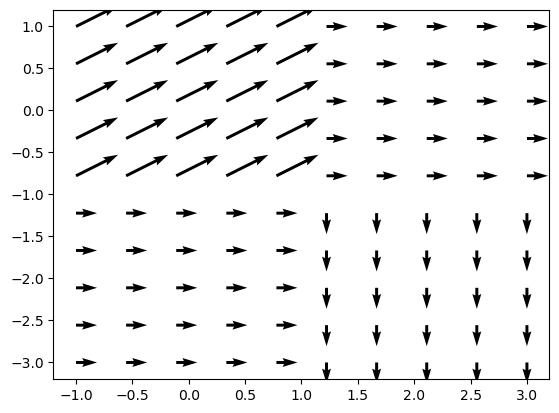

In [34]:
# Global transformation.
translation = sitk.TranslationTransform(2, (1.0, 0.0))  # 2 means 2D

# Displacement in region 1.
displacement1 = sitk.DisplacementFieldTransform(2)
field_size = [10, 20]
field_origin = [-1.0, -1.0]
field_spacing = [2.0 / 9.0, 2.0 / 19.0]
field_direction = [1, 0, 0, 1]  # direction cosine matrix (row major order)

# Concatenate all the information into  a single list.
displacement1.SetFixedParameters(
    field_size + field_origin + field_spacing + field_direction
)
displacement1.SetParameters(np.ones(len(displacement1.GetParameters())))

# Displacement in region 2.
displacement2 = sitk.DisplacementFieldTransform(2)
field_size = [10, 20]
field_origin = [1.0, -3]
field_spacing = [2.0 / 9.0, 2.0 / 19.0]
field_direction = [1, 0, 0, 1]  # direction cosine matrix (row major order)

# Concatenate all the information into a single list.
displacement2.SetFixedParameters(
    field_size + field_origin + field_spacing + field_direction
)
displacement2.SetParameters(-1.0 * np.ones(len(displacement2.GetParameters())))

# Composite transform which applies the global and local transformations.
composite = sitk.CompositeTransform([translation, displacement1, displacement2])

# Apply the composite transformation to points in ([-1,-3],[3,1]) and
# display the deformation using a quiver plot.

# Generate points.
numSamplesX = 10
numSamplesY = 10
coordsX = np.linspace(-1.0, 3.0, numSamplesX)
coordsY = np.linspace(-3.0, 1.0, numSamplesY)
XX, YY = np.meshgrid(coordsX, coordsY)

# Transform points and compute deformation vectors.
pointsX = np.zeros(XX.shape)
pointsY = np.zeros(XX.shape)
for index, value in np.ndenumerate(XX):
    px, py = composite.TransformPoint((value, YY[index]))
    pointsX[index] = px - value
    pointsY[index] = py - YY[index]

plt.quiver(XX, YY, pointsX, pointsY)

## Transform

This class represents a generic transform and is the return type from the registration framework (if not done in place). Underneath the generic facade is one of the actual classes. To find out who is hiding under the hood we can query the transform to obtain the [TransformEnum](https://simpleitk.org/doxygen/latest/html/namespaceitk_1_1simple.html#a527cb966ed81d0bdc65999f4d2d4d852).

We can then downcast the generic transform to its actual type and obtain access to the relevant methods.

In [35]:
anonymous_transform_type = sitk.Transform(sitk.TranslationTransform(2, (1.0, 0.0)))

try:
    print(anonymous_transform_type.GetOffset())
except:
    print("The generic transform does not have this method.")

if anonymous_transform_type.GetTransformEnum() == sitk.sitkTranslation:
    translation = sitk.TranslationTransform(anonymous_transform_type)
    print(translation.GetOffset())

The generic transform does not have this method.
(1.0, 0.0)


## Writing and Reading

The SimpleITK.ReadTransform() returns a SimpleITK.Transform . The content of the file can be any of the SimpleITK transformations or a composite (set of transformations). 

In [36]:
import os

# Create a 2D rigid transformation, write it to disk and read it back.
basic_transform = sitk.Euler2DTransform()
basic_transform.SetTranslation((1.0, 2.0))
basic_transform.SetAngle(np.pi / 2)

full_file_name = os.path.join(OUTPUT_DIR, "euler2D.tfm")

sitk.WriteTransform(basic_transform, full_file_name)

# The ReadTransform function returns an sitk.Transform no matter the type of the transform
# found in the file (global, bounded, composite).
read_result = sitk.ReadTransform(full_file_name)

print("Different types: " + str(type(read_result) != type(basic_transform)))
util.print_transformation_differences(basic_transform, read_result)


# Create a composite transform then write and read.
displacement = sitk.DisplacementFieldTransform(2)
field_size = [10, 20]
field_origin = [-10.0, -100.0]
field_spacing = [20.0 / (field_size[0] - 1), 200.0 / (field_size[1] - 1)]
field_direction = [1, 0, 0, 1]  # direction cosine matrix (row major order)

# Concatenate all the information into a single list.
displacement.SetFixedParameters(
    field_size + field_origin + field_spacing + field_direction
)
displacement.SetParameters(np.random.random(len(displacement.GetParameters())))

composite_transform = sitk.CompositeTransform([basic_transform, displacement])

full_file_name = os.path.join(OUTPUT_DIR, "composite.tfm")

sitk.WriteTransform(composite_transform, full_file_name)
read_result = sitk.ReadTransform(full_file_name)

util.print_transformation_differences(composite_transform, read_result)

Different types: False
Differences - min: 0.00, max: 0.00, mean: 0.00, std: 0.00
Differences - min: 0.00, max: 0.00, mean: 0.00, std: 0.00


<a href="02_images_and_resampling.ipynb"><h2 align=right>Next &raquo;</h2></a>